File is associated with lecture 20

# fMRI Analysis 

In [2]:
# Import the requred Packages
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib
# from google.colab import drive
# drive.mount('/content/drive')
# Load some anatomical MRI data (Available to download in https://github.com/lukassnoek/NI-edu/blob/master/NI-edu/fMRI-introduction/week_1/anat.nii.gz)
mri_file = '../../datasets/fMRI/anat.nii.gz'
img = nib.load(mri_file)
print(type(img))
print(img.shape)

<class 'nibabel.nifti1.Nifti1Image'>
(240, 240, 220)


In [3]:
# Extract the voxel size from MRI data.
hdr = img.header
print(hdr)
print(hdr.get_zooms())
print(hdr.get_xyzt_units())

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 220   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.        1.        1.        1.        0.008173  0.        0.
  0.      ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'ni-edu'
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.017374652
quatern_c       : 0.9993026
quatern_d       : -0.03294419
qoffset_x       : 122.24499
qoffs

In [4]:
# Load a sample fMRI data (Available to download in https://github.com/lukassnoek/NI-edu/blob/master/NI-edu/fMRI-introduction/week_1/func.nii.gz)
fmri_file = '../../datasets/fMRI/func.nii.gz'
f_img = nib.load(fmri_file)
print(f_img.shape)
print(f_img.header.get_zooms())
print(f_img.header.get_xyzt_units())

(80, 80, 44, 50)
(2.7, 2.7, 2.97, 0.7)
('mm', 'sec')


## NOTE

MRI takes higher resolution (one image)

fMRI takes lower resolution (multiple images overtime)

In [5]:
# Load the actual MRI data from the Nifti object
img_data = img.get_fdata()
print(type(img_data))
print(img_data.shape)
print(img_data)

<class 'numpy.ndarray'>
(240, 240, 220)
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.

# MRI

First few and Last few values are zero is because that area consists of empty space (no brain)

In [6]:
# Select a small patch in the middle of the brain.
mid_vox = img_data[118:121, 118:121, 108:111]
print(mid_vox)

[[[61978.4609375  49358.4140625  60996.90234375]
  [67727.59375    49498.63671875 55808.66015625]
  [72775.6171875  49077.96875    51041.0859375 ]]

 [[65484.03125    50199.75       54827.1015625 ]
  [71653.828125   50199.75       55107.546875  ]
  [75299.625      50760.640625   55387.9921875 ]]

 [[78524.75       51882.421875   51321.53125   ]
  [82310.765625   56229.328125   47815.9609375 ]
  [84694.546875   59594.67578125 41646.16015625]]]


(240, 220)


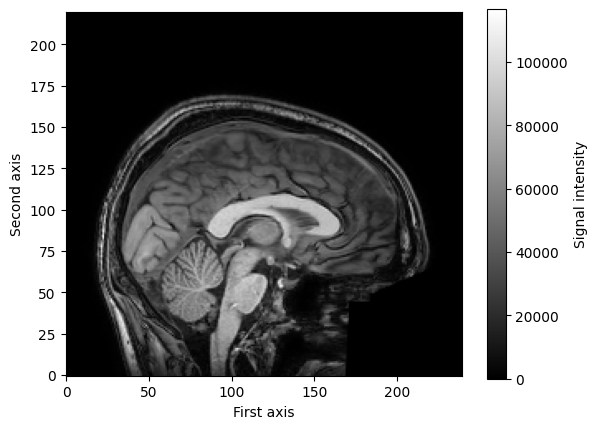

In [7]:
# Plot a slice of the MRI scan.
mid_slice_x = img_data[119, :, :]
print(mid_slice_x.shape)
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

# fMRI

In [8]:
# Load the actual fMRI data from the Nifti object
f_img_data = f_img.get_fdata()
print(f_img_data.shape)
# Select a small patch in the middle of the brain from first volume.
print(f_img_data[38:41, 38:41, 20:23, 0])

(80, 80, 44, 50)
[[[52805.65625    60819.890625   20578.92578125]
  [57084.4453125  55794.015625   17047.22851562]
  [55318.59375    54130.04296875  7301.10351562]]

 [[53111.28515625 43500.99609375 28661.07617188]
  [55488.38671875 49715.421875   20477.04882812]
  [53281.078125   50224.80078125  9304.66210938]]

 [[56846.734375   53756.5        52567.9453125 ]
  [55114.84375    55182.76171875 48798.5390625 ]
  [50055.0078125  56201.51953125 45334.76171875]]]


Shape of slice: (80, 44)


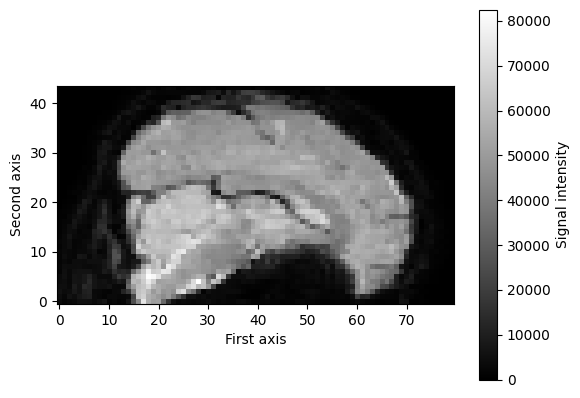

In [9]:
# Plot a slice of the first volume of fMRI scan.
mid_slice_x_fmri = f_img_data[39, :, :, 0]
print("Shape of slice: %s" % (mid_slice_x_fmri.shape,))
plt.imshow(mid_slice_x_fmri.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [10]:
# Extract the time series of one particular voxel
mid_vox_ts = f_img_data[39, 39, 21, :]
print("Voxel timeseries shape: %s" % (mid_vox_ts.shape,))

Voxel timeseries shape: (50,)


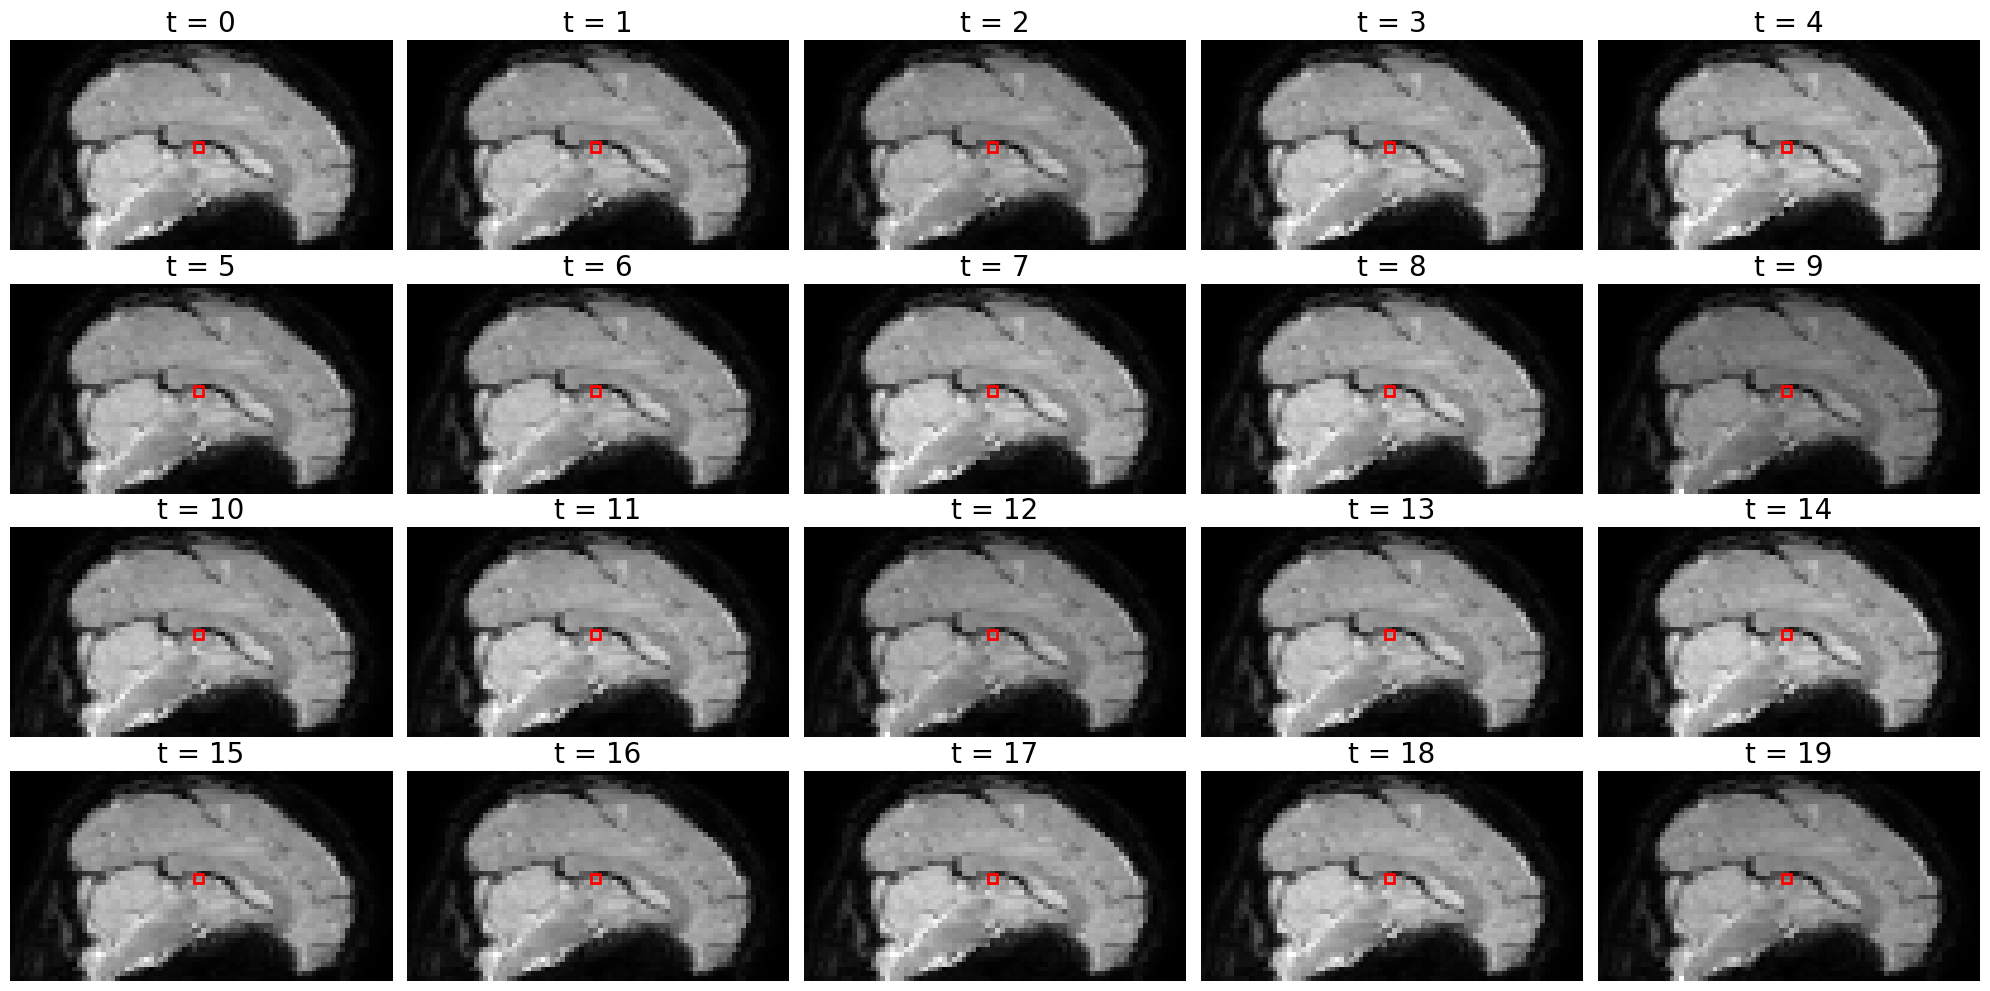

In [11]:
# Plot the voxel [39, 39, 21] over 20 time points.
from matplotlib import patches
fig, axes = plt.subplots(ncols=5, nrows=4, figsize=(20, 10)) # 20 timepoints
for t, ax in enumerate(axes.flatten()):
    ax.imshow(f_img_data[39, :, :, t].T, cmap='gray', origin='lower') # index with t!
    rect = patches.Rectangle((38, 20), 2, 2, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)
    ax.axis('off')
    ax.set_title('t = %i' % t, fontsize=20)
fig.tight_layout()